
0: 640x640 4 primarys, 116.2ms
Speed: 2.4ms preprocess, 116.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 primarys, 83.7ms
Speed: 2.1ms preprocess, 83.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 primary, 90.0ms
Speed: 1.5ms preprocess, 90.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 primarys, 87.6ms
Speed: 1.6ms preprocess, 87.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 primary, 91.0ms
Speed: 1.4ms preprocess, 91.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 88.8ms
Speed: 1.5ms preprocess, 88.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


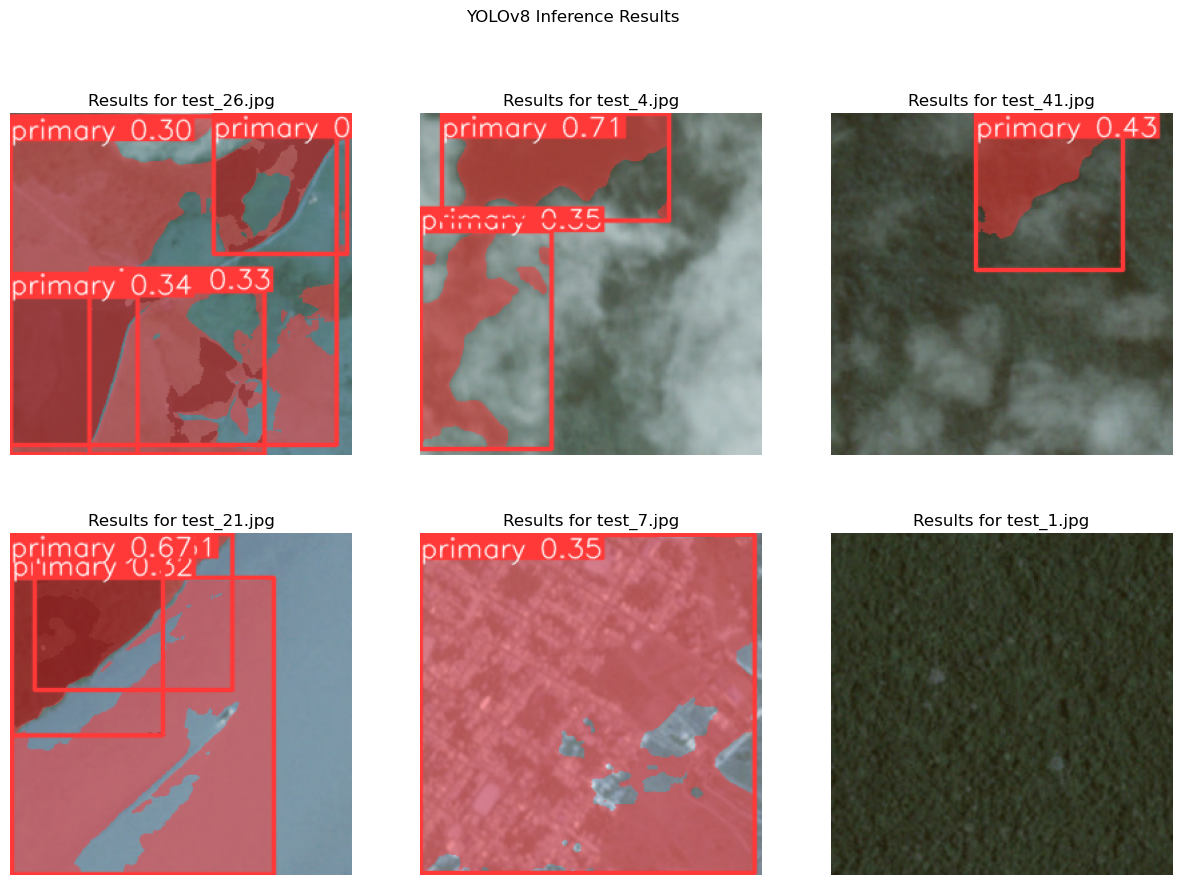

In [11]:
import torch
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from ultralytics import YOLO

# Path to your model weights and test images
weights_path = "/Users/katherinemartin/Desktop/Spring 2024/Computer_Vision_Deep_Learning/Final Project/runs/segment/train10/weights/best.pt"
test_images_path = Path("/Users/katherinemartin/Desktop/Spring 2024/Computer_Vision_Deep_Learning/Final Project/datasets/identdeforest/test")
test_images = ["test_26.jpg", "test_4.jpg", "test_41.jpg", "test_21.jpg", "test_7.jpg", "test_1.jpg"]

# Load the YOLOv8 model with custom weights
model = YOLO(weights_path)

# Function to run inference and collect results
def run_inference_and_collect_results(model, test_images_path, test_images):
    results_list = []
    for img_name in test_images:
        img_path = test_images_path / img_name
        img = Image.open(img_path).convert("RGB")
        img_np = np.array(img)
        
        # Run inference
        results = model(img_np)
        results_list.append((img_name, img_np, results))
    
    return results_list

# Collect results
results_list = run_inference_and_collect_results(model, test_images_path, test_images)

# Plot all results in a grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('YOLOv8 Inference Results')

for ax, (img_name, img_np, results) in zip(axs.flat, results_list):
    for result in results:
        img_with_boxes = result.plot()
        ax.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        ax.set_title(f'Results for {img_name}')
        ax.axis('off')

# Save the final image
output_path = "/Users/katherinemartin/Desktop/Spring 2024/Computer_Vision_Deep_Learning/Final Project/results_summary.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()
